In [1]:
import torch, torchvision
from torch import nn
from torch import optim
import torchvision.transforms as ToTensor
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [2]:
numb_batch = 1000
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
test_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=numb_batch)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=numb_batch)

# Pour avoir le meme y que la video

In [3]:
y1=[]
x1=[]
for i in range(20):
    y1.append(train_data[i][1])
    x1.append(train_data[i][0])
y= torch.tensor(y1)

# pour avoir le mem x que la video

In [4]:
x = torch.tensor([])
for i in range(20):
    x = torch.cat((x, x1[i]), 0)
x.shape

torch.Size([20, 28, 28])

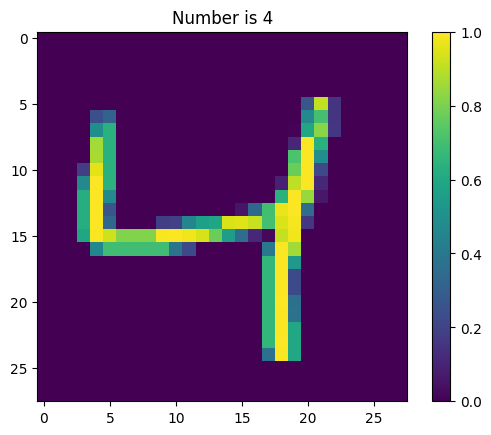

In [5]:
plt.imshow(x[2].numpy())
plt.title(f'Number is {y[2].numpy()}')
plt.colorbar()
plt.show()

In [6]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_new_test = F.one_hot(y_original)

In [7]:
y_original

tensor([2, 4, 3, 0, 1])

In [8]:
y_new_test

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [9]:
y

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])

In [10]:
y_new1 = F.one_hot(y, num_classes=10)
y_new = y_new1.type(torch.float32)
y_new

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
x.shape

torch.Size([20, 28, 28])

In [12]:
x.view(-1,28**2).shape

torch.Size([20, 784])

# PyTorch Dataset Object

In [13]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [14]:
train_dl1 = DataLoader(train_data, batch_size=5)

# Cross Entropy Loss

In [15]:
L = nn.CrossEntropyLoss()

# The Network

In [16]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [17]:
f = MyNeuralNet()

In [18]:
x.shape

torch.Size([20, 28, 28])

In [19]:
f(x)

tensor([[ 2.9289e-02, -1.5128e-01,  4.8358e-02,  2.8077e-04,  3.3983e-02,
         -5.4021e-02,  1.1898e-02, -9.9494e-02, -6.0851e-02,  4.1923e-03],
        [ 2.6702e-02, -1.5480e-01,  6.5186e-02, -2.6823e-02,  4.4356e-02,
         -6.2394e-02,  5.5992e-03, -1.3175e-01, -5.0718e-02,  5.5963e-02],
        [ 6.0690e-02, -1.7441e-01,  4.0666e-02,  9.8305e-03, -7.2871e-03,
         -3.4909e-02, -3.8536e-03, -9.4186e-02, -4.8664e-02, -3.5030e-02],
        [ 2.5091e-02, -1.3224e-01,  4.8779e-02, -1.9189e-02,  2.6920e-02,
         -6.4204e-02,  1.3103e-02, -9.2848e-02, -2.8752e-02,  1.9897e-03],
        [ 3.7906e-02, -1.6170e-01,  4.6304e-02, -3.0315e-03,  6.2451e-02,
          3.9049e-03,  3.1184e-03, -1.1085e-01, -3.0085e-02,  1.2058e-02],
        [ 4.3585e-02, -1.4396e-01,  3.9597e-02,  1.5213e-02,  3.1059e-02,
         -3.3343e-02,  2.0166e-02, -9.3644e-02, -5.2486e-02,  2.6352e-02],
        [ 6.1314e-02, -1.5135e-01,  3.2854e-02, -2.6836e-03,  4.0869e-02,
         -7.2947e-02,  5.2048e-0

In [20]:
y_new

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
L(f(x), y_new)

tensor(2.3171, grad_fn=<DivBackward1>)

# Training

In [22]:
def train_model(dl, f, n_epochs=5):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [23]:
len(train_dl)

60

In [24]:
epoch_data, loss_data = train_model(train_dl, f)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4


Text(0.5, 1.0, 'Cross Entropy (per batch)')

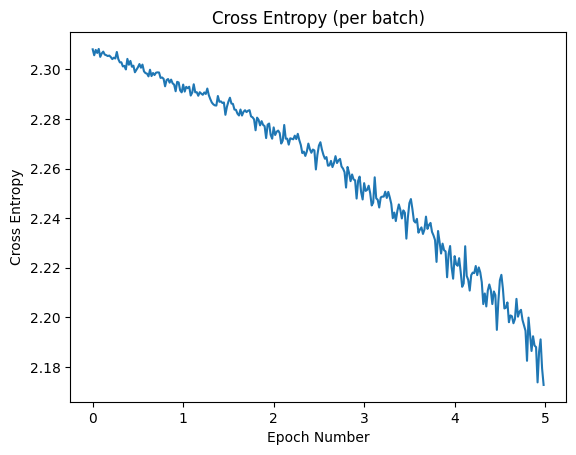

In [25]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [26]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

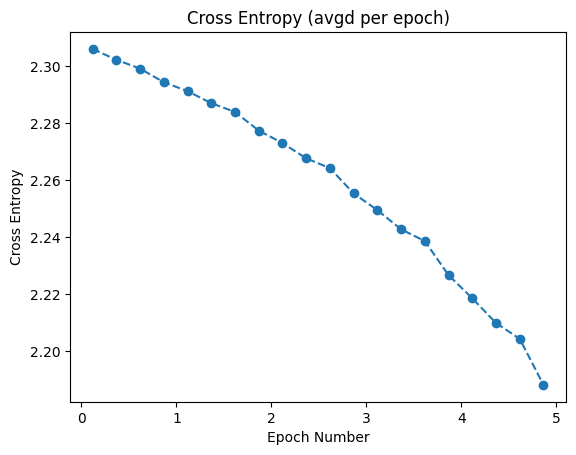

In [27]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [28]:
y_sample = y_new[0]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [29]:
x_sample = f(x)[0]
x_sample
yhat_sample = x_sample
yhat_sample

tensor([ 0.1955, -0.1272, -0.0408,  0.1659, -0.1069, -0.0710, -0.0870,  0.0189,
        -0.1129, -0.0641], grad_fn=<SelectBackward0>)

In [30]:
torch.argmax(yhat_sample)

tensor(0)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

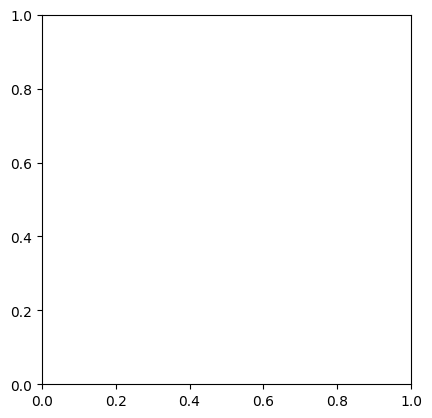

In [31]:

plt.imshow(x_sample)

In [32]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)

NameError: name 'train_ds' is not defined

NameError: name 'xs' is not defined

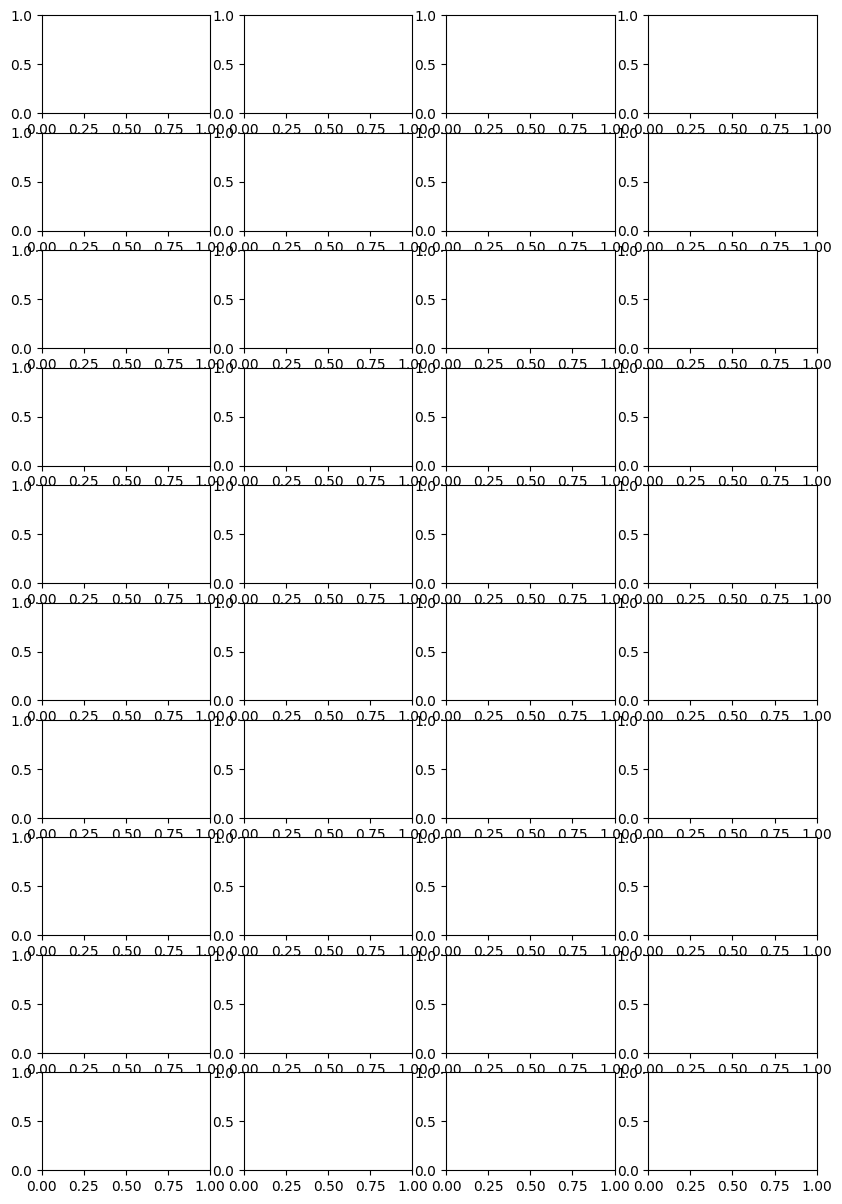

In [33]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

In [34]:
xs, ys = test_ds[:2000]
yhats = f(xs).argmax(axis=1)

NameError: name 'test_ds' is not defined

NameError: name 'xs' is not defined

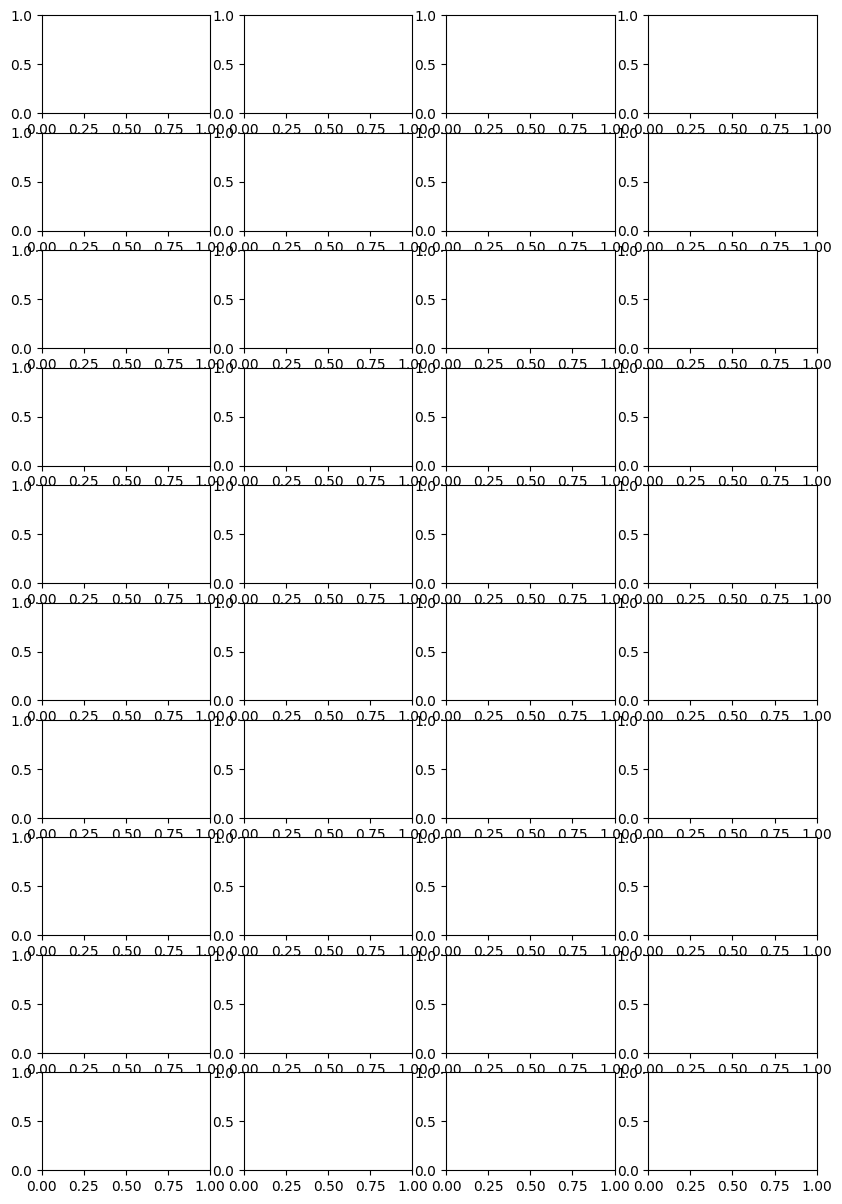

In [35]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()